In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import random
import cv2


import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

from tqdm.auto import tqdm

from dataloading.nvidia import NvidiaResizeAndCrop, Normalize, NvidiaDataset
from trainer import Trainer

%load_ext autoreload
%autoreload 2

In [3]:
def draw_box(img, xmin, ymin, xmax, ymax, width=3):
    return torchvision.utils.draw_bounding_boxes(img,
                    boxes=torch.tensor([[xmin, ymin, xmax, ymax]]), 
                    colors=["red"],
                    width=width)
    
def draw_boxes_narrow(img, x_delta=0, y_delta=75):
    
    img_box = draw_box(img, 186+x_delta, 600-y_delta, 1734+x_delta, 969-y_delta)
    
    img_box = draw_box(img_box, 186+x_delta, 600-y_delta, 573+x_delta, 784-y_delta)
    img_box = draw_box(img_box, 573+x_delta, 600-y_delta, 960+x_delta, 784-y_delta)
    img_box = draw_box(img_box, 960+x_delta, 600-y_delta, 1347+x_delta, 784-y_delta)
    img_box = draw_box(img_box, 1347+x_delta, 600-y_delta, 1734+x_delta, 784-y_delta)
    
    img_box = draw_box(img_box, 186+x_delta, 784-y_delta, 573+x_delta, 969-y_delta)
    img_box = draw_box(img_box, 573+x_delta, 784-y_delta, 960+x_delta, 969-y_delta)
    img_box = draw_box(img_box, 960+x_delta, 784-y_delta, 1347+x_delta, 969-y_delta)
    img_box = draw_box(img_box, 1347+x_delta, 784-y_delta, 1734+x_delta, 969-y_delta)

    return img_box

def draw_boxes_wide(img, x_delta=0):
    
    height=1208
    width=1920
    
    ymin = 520
    ymax = 864
    
    img_box = draw_box(img, 300+x_delta, ymin, 1620+x_delta, ymax, width=5)
    
    #img_box = draw_box(img_box, 300+x_delta, ymin, 960+x_delta, ymax)
    #img_box = draw_box(img_box, 960+x_delta, ymin, 1620+x_delta, ymax)
    
#     img_box = draw_box(img_box, 186+x_delta, 600-y_delta, 573+x_delta, 784-y_delta)
#     img_box = draw_box(img_box, 573+x_delta, 600-y_delta, 960+x_delta, 784-y_delta)
#     img_box = draw_box(img_box, 960+x_delta, 600-y_delta, 1347+x_delta, 784-y_delta)
#     img_box = draw_box(img_box, 1347+x_delta, 600-y_delta, 1734+x_delta, 784-y_delta)
    
#     img_box = draw_box(img_box, 186+x_delta, 784-y_delta, 573+x_delta, 969-y_delta)
#     img_box = draw_box(img_box, 573+x_delta, 784-y_delta, 960+x_delta, 969-y_delta)
#     img_box = draw_box(img_box, 960+x_delta, 784-y_delta, 1347+x_delta, 969-y_delta)
#     img_box = draw_box(img_box, 1347+x_delta, 784-y_delta, 1734+x_delta, 969-y_delta)

    return img_box

In [4]:
model_path = "models/1-pilotnet-base/1cam-batch-v5"

root_path = Path("/home/romet/data/datasets/ut/nvidia-data")
#valid_paths = [root_path / "2021-05-20-12-36-10_e2e_sulaoja_20_30"]
#valid_paths = [root_path / "2021-05-20-12-51-29_e2e_sulaoja_20_30"]
valid_paths = [root_path / "2021-05-28-15-19-48_e2e_sulaoja_20_30"]
validset = NvidiaDataset(valid_paths)

In [5]:
frame_idx = 1200
#frame_idx = 0

In [6]:

# validset = NvidiaDataset(valid_paths, transform=None, camera="front_narrow")
# img = validset[frame_idx]["image"]
# print(img.shape)
# img_box = draw_boxes(img,)
# plt.figure(figsize=(8, 8))
# plt.imshow(img_box.permute(1, 2, 0))

In [7]:
# tr = transforms.Compose([NvidiaSideCameraZoom(0.26)])
# validset = NvidiaDataset(valid_paths, transform=tr, camera="right", steering_correction=0.2)

# img = validset[frame_idx]["image"]
# print(img.shape)
# img_box = draw_boxes(img)
# plt.figure(figsize=(8, 8))
# plt.imshow(img_box.permute(1, 2, 0))

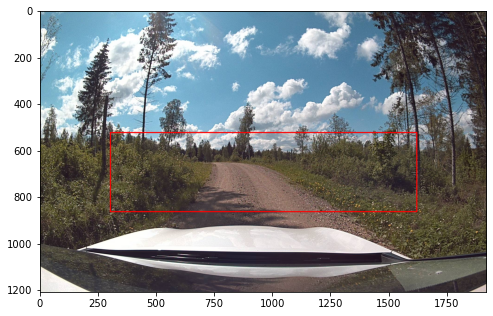

In [8]:
validset = NvidiaDataset(valid_paths, transform=None, camera="front_wide")
center_wide = validset[frame_idx]["image"]
center_wide = draw_boxes_wide(center_wide)
plt.figure(figsize=(8, 8))
plt.imshow(center_wide.permute(1, 2, 0))
plt.savefig("front-wide-crop.png")

torch.Size([3, 1208, 1920])


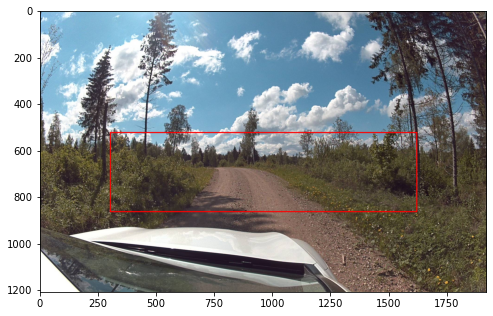

In [12]:
validset = NvidiaDataset(valid_paths, transform=None, camera="right", steering_correction=0.2)
#right_delta = 150
right_delta = 0
img = validset[frame_idx]["image"]
print(img.shape)
img_right = draw_boxes_wide(img, right_delta)
plt.figure(figsize=(8, 8))
plt.imshow(img_right.permute(1, 2, 0))

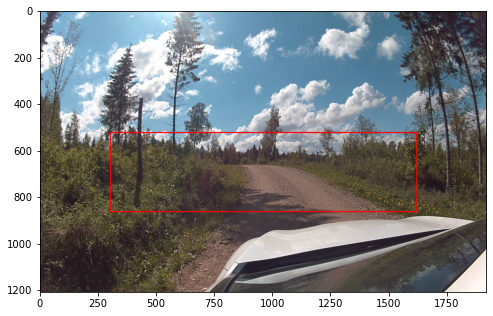

In [13]:
from dataloading.nvidia import NvidiaSideCameraZoom

tr = transforms.Compose([NvidiaSideCameraZoom(0.0)])
validset = NvidiaDataset(valid_paths, transform=tr, camera="left", steering_correction=-0.2)

img = validset[frame_idx]["image"]
#left_delta = -25
left_delta = 0
img_left = draw_boxes_wide(img, left_delta)
plt.figure(figsize=(8, 8))
plt.imshow(img_left.permute(1, 2, 0))

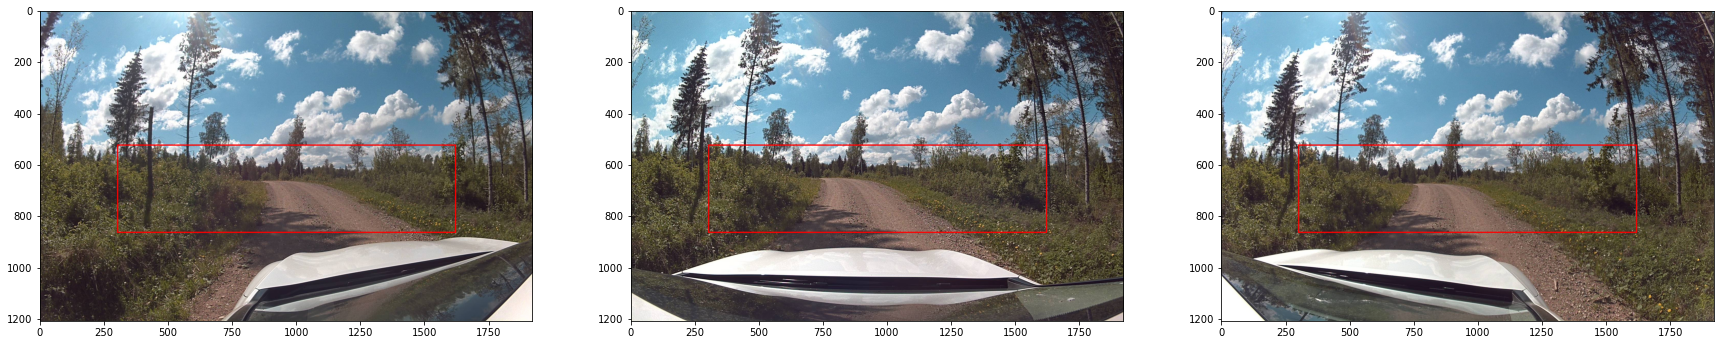

In [15]:

fig, (left_ax, center_ax, right_ax) = plt.subplots(1, 3, figsize=(30, 20))
left_ax.imshow(img_left.permute(1, 2, 0))
center_ax.imshow(center_wide.permute(1, 2, 0))
right_ax.imshow(img_right.permute(1, 2, 0))
plt.savefig("camera_crops.png")

torch.Size([3, 68, 264])


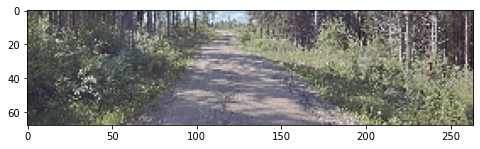

In [823]:
from dataloading.nvidia import NvidiaCropWide

tr = transforms.Compose([NvidiaCropWide()])
validset = NvidiaDataset(valid_paths, transform=tr, camera="front_wide")
center_crop = validset[frame_idx]["image"]
print(center_crop.shape)
#center_wide = draw_boxes_wide(center_wide)
plt.figure(figsize=(8, 8))
plt.imshow(center_crop.permute(1, 2, 0))

torch.Size([3, 68, 264])


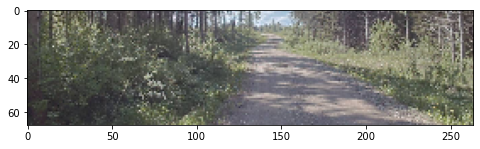

In [824]:
tr = transforms.Compose([NvidiaCropWide(x_delta=left_delta)])
validset = NvidiaDataset(valid_paths, transform=tr, camera="left")
left_crop = validset[frame_idx]["image"]
print(left_crop.shape)
plt.figure(figsize=(8, 8))
plt.imshow(left_crop.permute(1, 2, 0))

torch.Size([3, 68, 264])


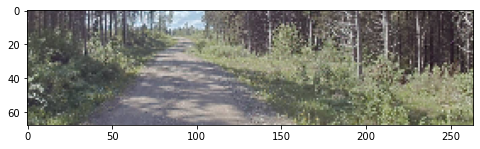

In [825]:
tr = transforms.Compose([NvidiaCropWide(x_delta=right_delta)])
validset = NvidiaDataset(valid_paths, transform=tr, camera="right")
right_crop = validset[frame_idx]["image"]
print(right_crop.shape)
plt.figure(figsize=(8, 8))
plt.imshow(right_crop.permute(1, 2, 0))